<a href="https://colab.research.google.com/github/Polqer/diplommel1/blob/main/3attempt_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install efficientnet-pytorch
!git clone https://github.com/Polqer/diplommel1.git
!pip install torchcam


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.2 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=626fb4fad96c394628edc8a7b980f53af1167ec4e108b1f9a

In [2]:
!pip install torchcam


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda:0
GPU: Tesla T4


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 141MB/s]


Epoch 0/19
----------
train Loss: 3.6525 Acc: 0.3074
val Loss: 4.0295 Acc: 0.4407
Модель сохранена в /content/diplommel1/checkpoint/best_model.ckpt
Epoch 1/19
----------
train Loss: 3.2889 Acc: 0.3074
val Loss: 3.7825 Acc: 0.4237
Epoch 2/19
----------
train Loss: 3.2305 Acc: 0.2944
val Loss: 3.1130 Acc: 0.2712
Epoch 3/19
----------
train Loss: 3.1605 Acc: 0.2944
val Loss: 3.0124 Acc: 0.2881
Epoch 4/19
----------
train Loss: 3.1408 Acc: 0.2814
val Loss: 3.0154 Acc: 0.2542
Epoch 5/19
----------
train Loss: 3.0888 Acc: 0.2771
val Loss: 3.0734 Acc: 0.2712
Epoch 6/19
----------
train Loss: 3.0879 Acc: 0.2684
val Loss: 3.0734 Acc: 0.2712
Epoch 7/19
----------
train Loss: 3.0876 Acc: 0.2771
val Loss: 3.0734 Acc: 0.2542
Epoch 8/19
----------
train Loss: 3.0711 Acc: 0.2814
val Loss: 3.0734 Acc: 0.2542
Epoch 9/19
----------
train Loss: 3.0876 Acc: 0.2814
val Loss: 3.0734 Acc: 0.2542
Epoch 10/19
----------
train Loss: 3.0876 Acc: 0.2597
val Loss: 3.0734 Acc: 0.2542
Epoch 11/19
----------
train Lo

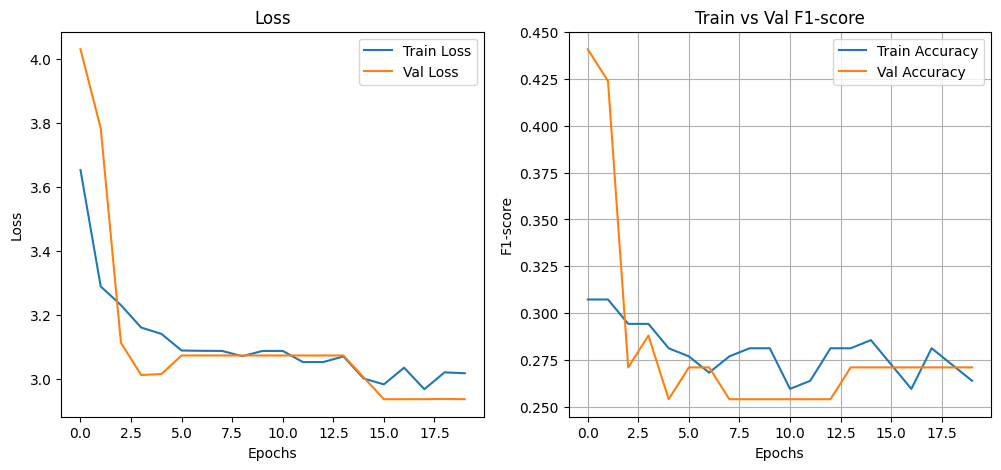

Epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
Val Accuracy,█▇▂▂▁▂▂▁▁▁▁▁▁▂▂▂▂▂▂▂
Val Loss,█▆▂▁▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁
Val accuracy,█▇▂▂▁▂▂▁▁▁▁▁▁▂▂▂▂▂▂▂
Val macro/f1,▃█▂▃▁▂▂▂▂▁▁▁▁▂▂▁▁▁▁▁
Val macro/precision,▃▇▆█▄▆█▆▆▄▄▄▄▆▆▁▁▁▁▁
Val macro/recall,▄█▂▄▁▂▂▁▁▁▁▁▁▂▃▄▄▄▄▄
Val micro/f1,█▇▂▂▁▂▂▁▁▁▁▁▁▂▂▂▂▂▂▂
Val micro/precision,█▇▂▂▁▂▂▁▁▁▁▁▁▂▂▂▂▂▂▂
Val micro/recall,█▇▂▂▁▂▂▁▁▁▁▁▁▂▂▂▂▂▂▂
Val micro/roc_auc_score,▇█▆▆▂▁▃▅▅▆▅▆▅▄▇▇▆█▇▄


In [4]:
import time
import copy
import torch
import wandb
import numpy as np
import matplotlib.pyplot as plt
import gc
import torch.nn as nn
import os
import torch.optim as optim
import torch.nn.functional as F
from efficientnet_pytorch import EfficientNet
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from scipy.io import loadmat
from pathlib import Path
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from google.colab import drive
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision import models

# Определение устройства
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

drive.mount('/content/drive')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if device.type == "cuda":
    print(f"GPU: {torch.cuda.get_device_name(0)}")


train_dir = '/content/diplommel1/datamat/train'
val_dir = '/content/diplommel1/datamat/test'

wandb.init(project="my-awesome-project", name= "matResnet")

batch_size = 32
num_epochs = 20
learning_rate = 0.0001
input_size = (16, 256, 256)  # (каналы, высота,ширина)
num_classes = 3  # "mm", "nn", "other"



#т.к. данные являются несбалансированными Focal Loss уменьшает влияние легко классифицируемых примеров и делает модель более чувствительной к сложным случаям
class FocalLoss(nn.Module):
    def __init__(self, gamma=2., alpha=0.25, num_classes=3):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.num_classes = num_classes

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, 1e-7, 1 - 1e-7)  # Чтобы избежать логарифмирования 0
        targets = torch.eye(self.num_classes).to(inputs.device).index_select(dim=0, index=targets)  # Преобразуем метки в one-hot
        cross_entropy_loss = -targets * torch.log(inputs)
        loss = self.alpha * torch.pow(1 - inputs, self.gamma) * cross_entropy_loss
        return loss.sum(dim=1).mean()  # Среднее по батчу

#датасет
class HyperspectralDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = Path(root_dir)  #Путь к корню директории с данными
        self.transform = transform
        self.classes = sorted([d.name for d in self.root_dir.iterdir() if d.is_dir()])  #Список классов из папок
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(self.classes)}  #Индексация классов
        self.files = []

#Проходим по всем классам и добавляем файлы
        for cls_name in self.classes:
            class_dir = self.root_dir / cls_name
            for file_path in class_dir.glob("*.mat"):  # Поиск .mat файлов в каждой папке
                self.files.append((file_path, self.class_to_idx[cls_name]))  # Добавляем файл и метку

    def __len__(self):
        return len(self.files)  #Возвращаем общее количество файлов

    def __getitem__(self, idx):
        file_path, label = self.files[idx]  #Получаем путь к файлу и метку класса
        mat_data = loadmat(file_path)  #Загружаем данные из .mat файла

        #Проверка наличия ожидаемого ключа в файле
        if 'DataCubeC' not in mat_data:
            raise KeyError(f"Ключ 'DataCubeC' не найден в файле {file_path}")

        #Получаем изображение
        image = mat_data['DataCubeC']
        image = np.transpose(image, (2, 0, 1))  #Преобразуем в формат (channels, height, width)
        #Преобразуем изображение в тензор PyTorch
        image = torch.tensor(image, dtype=torch.float32)
        #применяем трансформации
        if self.transform:
            image = self.transform(image)

        return image, label
#Модель с EfficientNet3D EfficientNet предназначен для работы с трёхмерными (3D) данными, например:
# Медицинские изображения (MRI, CT, гиперспектральные кубы) Видео (кадры как временные слои)

# Загрузите свою модель (например, ResNet, модифицированный для гиперспектральных изображений)
class CustomResNet(nn.Module):
    def __init__(self, num_classes, num_channels=16):  # Убедитесь, что используете 16 каналов
        super(CustomResNet, self).__init__()
        self.resnet = models.resnet50(pretrained=True)  # Используем предобученную ResNet50

        # Изменяем первый сверточный слой для работы с гиперспектральными изображениями (16 каналов)
        self.resnet.conv1 = nn.Conv2d(num_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

        # Заменяем последний слой на классификацию по 3 классам
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

#Расчет метрик
def calculate_metrics(y_true, y_pred, y_true_proba, y_pred_proba):
    return {
        'accuracy': accuracy_score(y_true=y_true, y_pred=y_pred),
        'confusion_matrix': confusion_matrix(y_true=y_true, y_pred=y_pred),
        'micro/precision': precision_score(y_true=y_true, y_pred=y_pred, average='micro', zero_division=0),
        'micro/recall': recall_score(y_true=y_true, y_pred=y_pred, average='micro', zero_division=0),
        'micro/f1': f1_score(y_true=y_true, y_pred=y_pred, average='micro', zero_division=0),
        'micro/roc_auc_score': roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='macro'),
        'macro/precision': precision_score(y_true=y_true, y_pred=y_pred, average='macro', zero_division=0),
        'macro/recall': recall_score(y_true=y_true, y_pred=y_pred, average='macro', zero_division=0),
        'macro/f1': f1_score(y_true=y_true, y_pred=y_pred, average='macro', zero_division=0),
        'roc_auc_score':  roc_auc_score(y_true=y_true_proba, y_score=y_pred_proba, average=None, multi_class='ovr'),
        'weighted/precision': precision_score(y_true=y_true, y_pred=y_pred, average='weighted', zero_division=0),
        'weighted/recall': recall_score(y_true=y_true, y_pred=y_pred, average='weighted', zero_division=0),
        'weighted/f1': f1_score(y_true=y_true, y_pred=y_pred, average='weighted', zero_division=0)
    }


# Трансформации
transform = transforms.Compose([transforms.Normalize(mean=[0.5], std=[0.5])])

# Загрузка данных
train_dataset = HyperspectralDataset(train_dir, transform=transform)
val_dataset = HyperspectralDataset(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Инициализация модели
model = CustomResNet(num_classes=num_classes).to(device)

# Функция потерь и оптимизатор
criterion = FocalLoss(gamma=2.0, alpha=0.25, num_classes=num_classes)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Функция обучения
def train_model(model, criterion, optimizer, num_epochs, checkpoint_dir="/content/diplommel1/checkpoint"):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
# Создаём папку для чекпоинтов, если её нет
    os.makedirs(checkpoint_dir, exist_ok=True)
    checkpoint_path = os.path.join(checkpoint_dir, "best_model.ckpt")
    # История обучения
    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}\n' + '-' * 10)

        for phase, loader in [('train', train_loader), ('val', val_loader)]:
            is_train = phase == 'train'
            model.train(is_train)

            running_loss = 0.0
            running_corrects = 0

            all_labels, all_preds, all_true_proba, all_pred_proba = [], [], [], []

            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()

                with torch.set_grad_enabled(is_train):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    probabilities = torch.softmax(outputs, dim=1).detach().cpu().numpy()

                    if is_train:
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())
                all_true_proba.extend(np.eye(outputs.shape[1])[labels.cpu().numpy()])
                all_pred_proba.extend(probabilities)

            # Средние значения за эпоху
            dataset_size = len(loader.dataset)
            epoch_loss = running_loss / dataset_size
            epoch_acc = (running_corrects.double() / dataset_size).item()

            history[f"{phase}_loss"].append(epoch_loss)
            history[f"{phase}_acc"].append(epoch_acc)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val':
                # Вычисление метрик
                try:
                    metrics = calculate_metrics(
                        y_true=all_labels,
                        y_pred=all_preds,
                        y_true_proba=np.array(all_true_proba),
                        y_pred_proba=np.array(all_pred_proba)
                    )
                    wandb.log({
                        "Val Loss": epoch_loss,
                        "Val Accuracy": epoch_acc,
                        **{f"Val {k}": v for k, v in metrics.items() if k != 'confusion_matrix'},
                        "Epoch": epoch
                    })
                except Exception as e:
                    print(f"Ошибка при расчете метрик: {e}")

                # Обновление лучшей модели
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                    # Сохранение модели в формате .ckpt
                    torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'loss': epoch_loss,
                        'accuracy': epoch_acc
                    }, checkpoint_path)
                    print(f'Модель сохранена в {checkpoint_path}')

        torch.cuda.empty_cache()
        gc.collect()

    # Время обучения
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)

    # Построение графиков
    plt.figure(figsize=(12, 5))

    # График Loss
    plt.subplot(1, 2, 1)
    plt.plot(history["train_loss"], label='Train Loss')
    plt.plot(history["val_loss"], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss')

    # График Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history["train_acc"], label='Train Accuracy')
    plt.plot(history["val_acc"], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy')



    return model
# Вызов функции обучения
train_model(model, criterion, optimizer, num_epochs)


plt.xlabel("Epochs")
plt.ylabel("F1-score")
plt.title("Train vs Val F1-score")
plt.legend()
plt.grid(True)
plt.show()
wandb.finish()

In [11]:

api = wandb.Api()
run_id = "hod5axm0?nw"  # ID нужного эксперимента (посмотрите в UI wandb)
run = api.run(f"my-awesome-project/{run_id}")  # Формат "проект/идентификатор_запуска"
history = run.history(keys=["Train F1-score", "Val F1-score", "_step"])
wandb_plot_f1 = wandb.Api().run(wandb.run.path).history(keys=["Train F1-score", "Val F1-score"])

# Строим график F1-score
plt.figure(figsize=(8, 5))
plt.plot(wandb_plot_f1["_step"], wandb_plot_f1["Train F1-score"], label="Train F1-score", marker="o")
plt.plot(wandb_plot_f1["_step"], wandb_plot_f1["Val F1-score"], label="Val F1-score", marker="o")

CommError: Could not find run <Run polina-delitzsch-etu/my-awesome-project/hod5axm0%3Fnw (not found)>

In [34]:
import wandb

AttributeError: module 'wandb.sdk' has no attribute 'lib'

In [29]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision import models
import torch.nn as nn
from scipy.io import loadmat
from torchvision import transforms

# Загрузите свою модель (например, ResNet, модифицированный для гиперспектральных изображений)
class CustomResNet(nn.Module):
    def __init__(self, num_classes, num_channels=16):  # Убедитесь, что используете 16 каналов
        super(CustomResNet, self).__init__()
        self.resnet = models.resnet50(pretrained=True)  # Используем предобученную ResNet50

        # Изменяем первый сверточный слой для работы с гиперспектральными изображениями (16 каналов)
        self.resnet.conv1 = nn.Conv2d(num_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

        # Заменяем последний слой на классификацию по 3 классам
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Инициализация модели
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomResNet(num_classes=16, num_channels=16).to(device)  # Убедитесь, что используете 16 каналов

# Путь к изображению
image_path = '/content/diplommel1/datamat/train/DNcube/101.mat'
mat_data = loadmat(image_path)
image = mat_data['DataCubeC']

# Проверим размерность изображения
print(f"Shape of image: {image.shape}")  # Ожидаем (272, 512, 16)

# Изменяем порядок осей, чтобы каналы шли первыми
image = np.transpose(image, (2, 0, 1))  # Преобразуем в (каналы, высота, ширина)
print(f"Shape of image after transpose: {image.shape}")  # Ожидаем (16, 272, 512)

# Преобразуем в тензор PyTorch и добавляем размерность batch
image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).to(device)  # Добавляем batch dimension
print(f"Shape of image_tensor after unsqueeze: {image_tensor.shape}")  # Ожидаем (1, 16, 272, 512)

# Нормализация данных (если это необходимо для вашей модели)
transform = transforms.Compose([
    transforms.Normalize(mean=[0.5]*16, std=[0.5]*16),  # Нормализация по 16 каналам
])

# Применяем трансформацию
image_tensor = transform(image_tensor)
print(f"Shape of image_tensor after transformation: {image_tensor.shape}")  # Ожидаем (1, 16, 272, 512)

# Прямой проход через модель
model.eval()  # Убедимся, что модель в режиме оценки
output = model(image_tensor)  # Выполняем forward pass
print(f"Shape of output after forward pass: {output.shape}")  # Ожидаем (1, 3)

# Пример использования Grad-CAM
# Пример использования Grad-CAM
cam = GradCAM(model)  # Инициализация GradCAM без target_layers

# Указание целевого слоя. Поменяем слой, чтобы использовать слой с нужной размерностью
grads = cam(image_tensor, target_layer=model.resnet.layer4[2])  # Указание целевого слоя


print(f"Shape of grads: {grads.shape}")  # Ожидаем (1, 7, 7)

# Получение карты активации
activation_map = grads[0].cpu().numpy()
print(f"Shape of activation_map: {activation_map.shape}")  # Ожидаем (7, 7)



# Визуализация карты активации
plt.imshow(activation_map, cmap='jet')
plt.title("Grad-CAM Activation Map")
plt.colorbar()
plt.show()

# Наложение тепловой карты на изображение
image_to_display = image[0]  # Берем первый канал для отображения (если изображение многоканальное)
print(f"Shape of image_to_display before transpose: {image_to_display.shape}")  # Ожидаем (16, 272, 512)
image_to_display = image_to_display.transpose(1, 2, 0)  # Переводим в формат HWC
print(f"Shape of image_to_display after transpose: {image_to_display.shape}")  # Ожидаем (272, 512, 16)

# Наложение тепловой карты с использованием overlay_mask
overlay = overlay_mask(image_to_display, activation_map, alpha=0.5)
plt.imshow(overlay)
plt.title("Grad-CAM Overlay on Image")
plt.show()


Shape of image: (272, 512, 16)
Shape of image after transpose: (16, 272, 512)
Shape of image_tensor after unsqueeze: torch.Size([1, 16, 272, 512])
Shape of image_tensor after transformation: torch.Size([1, 16, 272, 512])
Shape of output after forward pass: torch.Size([1, 16])


RuntimeError: Given groups=1, weight of size [64, 16, 7, 7], expected input[1, 3, 224, 224] to have 16 channels, but got 3 channels instead

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from scipy.io import loadmat
import torch.nn as nn
from efficientnet_pytorch import EfficientNet
from PIL import Image
class EfficientNet1C(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNet1C, self).__init__()

        self.model = EfficientNet.from_pretrained('efficientnet-b0')

        # Изменяем первый слой на 1 канал
        in_channels = 1
        self.model._conv_stem = nn.Conv2d(in_channels=in_channels,
                                          out_channels=self.model._conv_stem.out_channels,
                                          kernel_size=self.model._conv_stem.kernel_size,
                                          stride=self.model._conv_stem.stride,
                                          padding=self.model._conv_stem.padding,
                                          bias=False)

        # Выходной слой на 3 класса
        in_features = self.model._fc.in_features
        self.model._fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Создаём модель
num_classes = 3
model = EfficientNet1C(num_classes).to(device)

# Устройство
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Функция загрузки изображения
def load_mat_image(file_path):
    mat_data = loadmat(file_path)
    if 'DataCubeC' not in mat_data:
        raise KeyError(f"Ключ 'DataCubeC' не найден в файле {file_path}")

    image = mat_data['DataCubeC']  # Извлекаем гиперспектральный куб
    image = np.transpose(image, (2, 0, 1))  # Переставляем оси: (каналы, высота, ширина)
    image = torch.tensor(image, dtype=torch.float32)  # Преобразуем в тензор PyTorch
    return image

# Путь к изображению
image_path = '/content/diplommel1/datamat/train/DNcube/101.mat'
image = load_mat_image(image_path)

# Оставляем только 1 канал (например, первый)
image = image[:1, :, :]  # (1, H, W)

# Добавляем размерность батча
image = image.unsqueeze(0).to(device)  # (1, 1, H, W)

# Определение модели EfficientNet с 16 каналами
class EfficientNet3D(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNet3D, self).__init__()

        self.model = EfficientNet.from_pretrained('efficientnet-b0')

        # Изменяем первый сверточный слой
        in_channels = 16  # Гиперспектральные изображения
        self.model._conv_stem = nn.Conv2d(in_channels=in_channels,
                                          out_channels=self.model._conv_stem.out_channels,
                                          kernel_size=self.model._conv_stem.kernel_size,
                                          stride=self.model._conv_stem.stride,
                                          padding=self.model._conv_stem.padding,
                                          bias=False)

        # Заменяем последний слой для 3 классов
        in_features = self.model._fc.in_features
        self.model._fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Создаём модель
num_classes = 3
model = EfficientNet3D(num_classes).to(device)
model.eval()

# Выбираем слой для Grad-CAM
target_layer = model.model._conv_head  # Последний сверточный слой

# Инициализируем Grad-CAM
cam_extractor = GradCAM(model, target_layer=model.model._conv_head)

# Пропускаем изображение через модель
output = model(image)
class_idx = output.argmax(dim=1).item()  # Получаем индекс предсказанного класса

# Получаем карту активации
activation_map = cam_extractor(class_idx, output)

# Преобразуем тензоры в numpy
activation_map = activation_map[0].cpu().detach().numpy()
image_np = image[0, 0].cpu().numpy()  # Берём 1 канал для наложения

# **Исправляем ошибку: нормализуем в 0-255 и конвертируем в `PIL.Image`**
image_pil = Image.fromarray((image_np * 255).astype(np.uint8), mode="L")  # "L" = градации серого
activation_pil = Image.fromarray((activation_map * 255).astype(np.uint8), mode="L")

# Накладываем карту активации
overlay = overlay_mask(image_pil.convert("RGB"), activation_pil.convert("RGB"))

# Отображаем результат
plt.imshow(overlay)
plt.axis('off')
plt.show()


Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b0


RuntimeError: Given groups=1, weight of size [32, 16, 3, 3], expected input[1, 1, 272, 512] to have 16 channels, but got 1 channels instead